## DFT from scratch

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#plt.style.use('ggplot')
plt.style.use('seaborn-notebook')

Here, we test `DFT` with a small discrete signal of 16 points, with triangle wave

In [164]:
#Transciption of code book Understand FFT
# pulsation for each sample 
# 2*np.pi on 1s => 1Hz of sampling

# Time N=16 * pi/8 => Total time = 6.28  = 2*pi = 1s
# 16 point durinng 1s,16 Hz of sampling,  1 step is here = 0.0625 s

Ts = 0.0625

# sampling information
Fs = 16 # sample rate
T = 1/Fs # sampling period
t = 1 # seconds of sampling
N = Fs*t # total points in signal

# Number of points for DFT
print("Sample rating Fs ={} Hz".format(Fs))
print("Sampling period T ={} s".format(T))
print("Second of sampling t ={} s".format(t))
print("Total points in signal N = {}".format(N))

Sample rating Fs =16 Hz
Sampling period T =0.0625 s
Second of sampling t =1 s
Total points in signal N = 16


For this, we search `coef` for cosinus and sinus harmonics of the generated function (triangle wave).


Order,	Cosinus, Sinus,	  Y
0.0	0.0000	0.0000	1.1715
1.0	1.0000	0.0000	0.9322
2.0	0.0000	0.0000	0.6147
3.0	0.1111	0.0000	0.3092
4.0	0.0000	0.0000	0.0000
5.0	0.0400	0.0000	-0.3092
6.0	0.0000	0.0000	-0.6147
7.0	0.0204	0.0000	-0.9322
8.0	0.0000	0.0000	-1.1715
9.0	0.0000	0.0000	-0.9322
10.0	0.0000	0.0000	-0.6147
11.0	0.0000	0.0000	-0.3092
12.0	0.0000	0.0000	-0.0000
13.0	0.0000	0.0000	0.3092
14.0	0.0000	0.0000	0.6147
15.0	0.0000	0.0000	0.9322


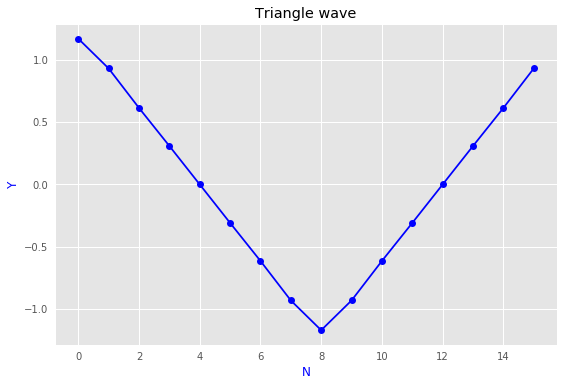

In [179]:
# List of coefficient for cosinus harmonics of the generated function
kc =  np.full((N),0,'float64') # 16 element in buffer coef cos
#List of Coefficient for sinus harmonics of the generated function
ks = np.full((N),0,'float64') # 16 element in buffer coef sinus

harmonic_order = [0,1,0,3,0,5,0,7]

# Generate harmonics odd order 1,3,5,7 
# For triangle wave, it's odd order harmonics divided by square
# Coef for cosinus for generated function, compute amplitude harmonics
harmonic_amplitude = np.linspace(1, (N//2)-1, 4) # from 1 to 7,nb item on intervale 4  [1. 3. 5. 7.]
#harmonics = 1/(harmonics*harmonics) 
harmonic_amplitude = 1/(np.square(harmonic_amplitude)) # Coefficient to cosinus  [1.         0.11111111 0.04       0.02040816]

kc[1] = harmonic_amplitude[0] # Fondamental 
kc[3] = harmonic_amplitude[1] # harmonic amplitude freq 3 (3 periods in N samples)
kc[5] = harmonic_amplitude[2] # harmonics amplitude freq 5 (5 periods in N samples)
kc[7] = harmonic_amplitude[3] # harmonics amplitude freq 7 (7 periods in N samples)

#Generate triangle wave function  
i = np.arange(N)# point 0 to 15 
y = np.cos(harmonic_order[1]*2*np.pi*T*i)*kc[1] + \
    np.cos(harmonic_order[3]*2*np.pi*T*i)*kc[3] + \
    np.cos(harmonic_order[5]*2*np.pi*T*i)*kc[5] + \
    np.cos(harmonic_order[7]*2*np.pi*T*i)*kc[7]


print("Order,\tCosinus, Sinus,\t  Y",end="\n")   
for index in range(N):
    print("{:.1f}\t{:.4f}\t{:.4f}\t{:.4f}".format(index,kc[index],ks[index],y[index]),end="\n")


#Other notation T = 1/N
#y = np.cos(2*np.pi*i/N) + np.cos(3*2*np.pi*i/N)/9 + np.cos(5*2*np.pi*i*N)/25 + np.cos(7*2*np.pi*i/N)/49

plt.style.use('ggplot')
plt.plot(i,y,'b-o')
plt.title("Triangle wave")
plt.ylabel('Y', color='blue')
plt.xlabel('N', color='blue')
plt.show()

Our aim is to find the differents harmonics present in the triangle wave

In [180]:
#Coefficient for frequency
Fc = np.full((N),0,'float64') # 16 element in buffer for frequency cosinus
Fs = np.full((N),0,'float64') # 16 element in buffer for frequency sinus

#Coeffcient for all point for display on graph
g_cos  = np.full((N,N),0,'float64')
g_sin  = np.full((N,N),0,'float64')

This a convolution operation, (generated function `*` cos and sin), we decompose each step. It can be done in 1 line with numpy (with matrix complex )

In [181]:
# We parse all frequency on the discrete signal for each point of N 

# Parse all frequency up to N
for freq in range(N):
    # Parse all point inside for each point of N
    for index in range(N):
        # Compute convolution for each point of N with cosinus and sinus and add all
        # Y generated function
        Fc[freq] = Fc[freq] + y[index]*np.cos(2*np.pi*freq*index/N)
        Fs[freq] = Fs[freq] + y[index]*np.sin(2*np.pi*freq*index/N)
        # Store earch value for future display 
        g_cos[freq][index] = Fc[freq] 
        g_sin[freq][index] = Fs[freq]
    
    # Compute the mean for each frequency
    Fc[freq] = abs(round(Fc[freq]/(N),5))
    Fs[freq] = abs(round(Fs[freq]/(N),5))

After this operation (convolution), we can compare `coeff` computed with the generated function

In [182]:
print("FREQ,\tF(COS),\tF(SIN),\tY(COS),\tY(SIN)",end="\n")    
for freq in range(N):
    print("{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}\t{4:.3f}".format(freq,Fc[freq],Fs[freq],kc[freq],ks[freq]),end="\n")

FREQ,	F(COS),	F(SIN),	Y(COS),	Y(SIN)
0.000	0.000	0.000	0.000	0.000
1.000	0.500	0.000	1.000	0.000
2.000	0.000	0.000	0.000	0.000
3.000	0.056	0.000	0.111	0.000
4.000	0.000	0.000	0.000	0.000
5.000	0.020	0.000	0.040	0.000
6.000	0.000	0.000	0.000	0.000
7.000	0.010	0.000	0.020	0.000
8.000	0.000	0.000	0.000	0.000
9.000	0.010	0.000	0.000	0.000
10.000	0.000	0.000	0.000	0.000
11.000	0.020	0.000	0.000	0.000
12.000	0.000	0.000	0.000	0.000
13.000	0.056	0.000	0.000	0.000
14.000	0.000	0.000	0.000	0.000
15.000	0.500	0.000	0.000	0.000


We find the only cosinus component were generated for the input function, all of the results obtained by the analysis are on half of the amplitude

We can see that the components from 9 through 15 are a `mirror image` of the components from 1 through 7
The frequencies abose The Nyquist frequencies are negatives frequencies. (consequently are complex conjugates of the frequencies below The Nyquist

#### Harmonic 1 fondamental
We test with harmonic 1, it's  present in the generated function with value 1 with 1/2

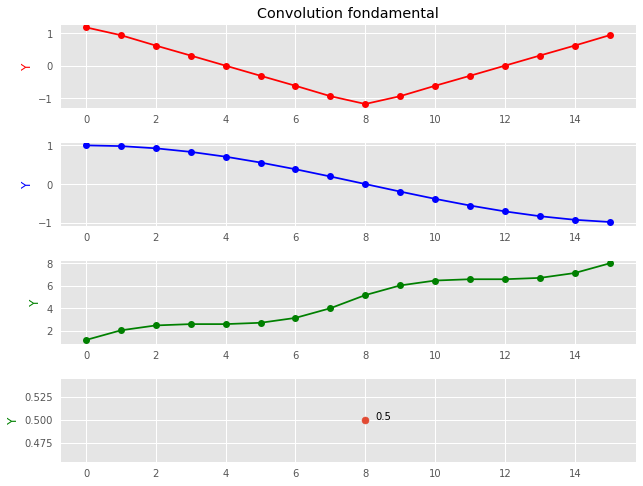

In [174]:
# Display values
fig1 = plt.figure(figsize=(10,35))
fig1.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.2)

gs0 = gridspec.GridSpec(4, 1)

#fondamental N 1
gs00 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[0], hspace=0.4)
ax0 = fig1.add_subplot(gs00[0])
ax0.plot(i, y, 'ro-')
ax0.set_title("Convolution fondamental")
ax0.set_ylabel('Y', color='red')

ax1 = fig1.add_subplot(gs00[1], sharex=ax0)
ax1.plot(i, np.cos(1*np.pi*i/N), 'b-o')
ax1.set_ylabel('Y', color='blue')

ax2 = fig1.add_subplot(gs00[2], sharex=ax0)
ax2.plot(i, g_cos[1], 'g-o')
ax2.set_ylabel('Y', color='green')

ax3 = fig1.add_subplot(gs00[3], sharex=ax0)
ax3.scatter(8, Fc[1])
ax3.set_ylabel('Y', color='green')
ax3.annotate(str(Fc[1]),xy=(8+0.3,Fc[1]))

plt.show()

#### Harmonic 3
We test with harmonic 5, it's  present in the generated function with value 1/(3*3), here 1/9/2

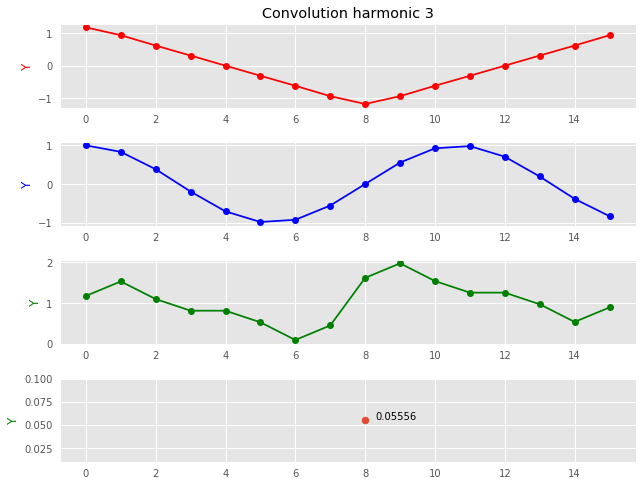

In [175]:
# Display values
fig2 = plt.figure(figsize=(10,35))
fig2.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.2)

gs0 = gridspec.GridSpec(4, 1)

#Harmonic N 3
gs01 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[1], hspace=0.4)
ax4 = fig2.add_subplot(gs01[0])
ax4.plot(i, y, 'ro-')
ax4.set_title("Convolution harmonic 3")
ax4.set_ylabel('Y', color='red')

ax5 = fig2.add_subplot(gs01[1], sharex=ax0)
ax5.plot(i, np.cos(3*np.pi*i/N), 'b-o')
ax5.set_ylabel('Y', color='blue')

ax6 = fig2.add_subplot(gs01[2], sharex=ax0)
ax6.plot(i, g_cos[3], 'g-o')
ax6.set_ylabel('Y', color='green')

ax7 = fig2.add_subplot(gs01[3], sharex=ax0)
ax7.scatter(8, Fc[3])
ax7.set_ylabel('Y', color='green')
ax7.annotate(str(Fc[3]),xy=(8+0.3,Fc[3]))

plt.show()

#### Harmonic 5
We test with harmonic 5, it's  present in the generated function with value 1/(5*5), here 1/25/2

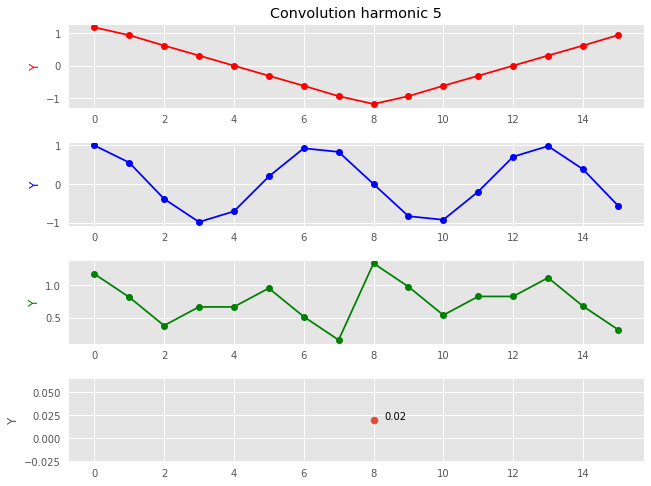

In [134]:
# Display values
fig3 = plt.figure(figsize=(10,35))
fig3.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.2)

gs0 = gridspec.GridSpec(4, 1)

#Harmonic N 5
gs02 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[2], hspace=0.4)
ax8 = fig3.add_subplot(gs02[0])
ax8.plot(i, y, 'ro-')
ax8.set_title("Convolution harmonic 5")
ax8.set_ylabel('Y', color='red')

ax9 = fig3.add_subplot(gs02[1], sharex=ax0)
ax9.plot(i, np.cos(5*np.pi*i/N), 'b-o')
ax9.set_ylabel('Y', color='blue')

ax10 = fig3.add_subplot(gs02[2], sharex=ax0)
ax10.plot(i, g_cos[5], 'g-o')
ax10.set_ylabel('Y', color='green')

ax11 = fig3.add_subplot(gs02[3], sharex=ax0)
ax11.scatter(8, Fc[5])
ax11.set_ylabel('Y')
ax11.annotate(str(Fc[5]),xy=(8+0.3,Fc[5]))

plt.show()

#### Harmonic 6
We test with harmonic 6, it's not present in the generated function, we see a symetric function so mean value = 0

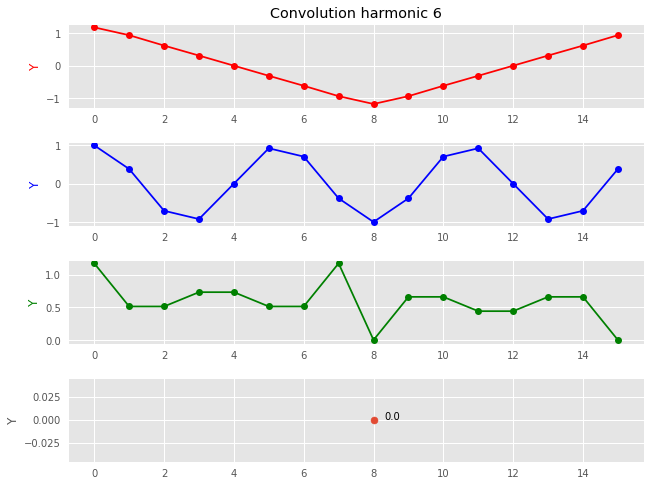

In [176]:
# Display values
fig4 = plt.figure(figsize=(10,35))
fig4.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.2)

gs0 = gridspec.GridSpec(4, 1)

#Harmonic N 6
gs02 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[2], hspace=0.4)
ax12 = fig4.add_subplot(gs02[0])
ax12.plot(i, y, 'ro-')
ax12.set_title("Convolution harmonic 6")
ax12.set_ylabel('Y', color='red')

ax13 = fig4.add_subplot(gs02[1], sharex=ax0)
ax13.plot(i, np.cos(6*np.pi*i/N), 'b-o')
ax13.set_ylabel('Y', color='blue')

ax14 = fig4.add_subplot(gs02[2], sharex=ax0)
ax14.plot(i, g_cos[6], 'g-o')
ax14.set_ylabel('Y', color='green')

ax15 = fig4.add_subplot(gs02[3], sharex=ax0)
ax15.scatter(8, Fc[6])
ax15.set_ylabel('Y')
ax15.annotate(str(Fc[6]),xy=(8+0.3,Fc[6]))

plt.show()

We can compute now with a FFT library. we use np.absolute to compute magnitude

Extract module of complex computed by FFT
FREQ,	FFT(j)		Mag FFT
0.000	-0.000+0.000j	0.000
1.000	0.500-0.000j	0.500
2.000	0.000+0.000j	0.000
3.000	0.056-0.000j	0.056
4.000	-0.000-0.000j	0.000
5.000	0.020-0.000j	0.020
6.000	0.000+0.000j	0.000
7.000	0.010-0.000j	0.010
8.000	0.000+0.000j	0.000
9.000	0.010+0.000j	0.010
10.000	0.000-0.000j	0.000
11.000	0.020+0.000j	0.020
12.000	-0.000+0.000j	0.000
13.000	0.056+0.000j	0.056
14.000	0.000-0.000j	0.000
15.000	0.500+0.000j	0.500


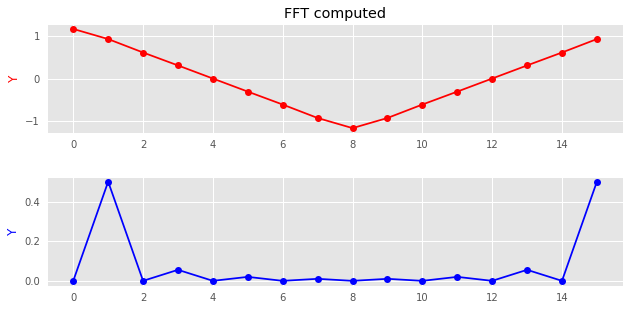

In [162]:
# Compute FFT with numpy
Y_k = np.fft.fft(y)[0:int(N)]/N
F = np.absolute(Y_k)

print("Extract module of complex computed by FFT")
print("FREQ,\tFFT(j)\t\tMag FFT",end="\n")    
for freq in range(N):
    print("{:.3f}\t{:.3f}\t{:.3f}".format(freq,Y_k[freq],F[freq]),end="\n")
    
# Display values
fig4 = plt.figure(figsize=(10,10))
fig4.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.2)

gs0 = gridspec.GridSpec(2, 1)

#Harmonic N 6
gs02 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[0], hspace=0.4)
ax16 = fig4.add_subplot(gs02[0])
ax16.plot(i, y, 'ro-')
ax16.set_title("FFT computed")
ax16.set_ylabel('Y', color='red')

ax17 = fig4.add_subplot(gs02[1], sharex=ax0)
ax17.plot(i,  F, 'b-o')
ax17.set_ylabel('Y', color='blue')


plt.show()